# Determination of the price of the automobile by considering various parameters by using the appropriate ML Algorithm

### Kevin Prince(1BY18EC090) 

In [1]:
#Importing all the reqired libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
%matplotlib inline


In [2]:
#Now the data from the csv file hast to be imported in order to proceed further steps.
data=pd.read_csv("Automobile price data _Raw_.csv")
data=pd.DataFrame(data)
print("Data imported successfully")

Data imported successfully


In [3]:
#showing the first 10 datasets of the data
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
#This function is used to describe each datasets and type of values it holds, number of values each column consists of.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#This process is used to convert all the unknnow('?') with Nan and converting it as float from obj

data.replace({'?':np.nan},inplace=True)
count_nan_in_df = data.isnull().sum()
print (count_nan_in_df)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


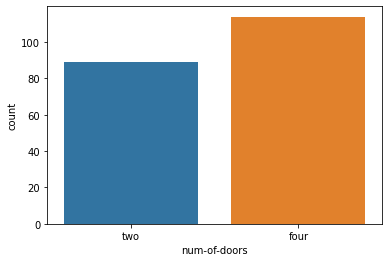

In [6]:
#It is observed that variables like normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm and price consists of unknowns. Mean of these columns can be replaced with the unknown values, but in case of num-of-doors it cannot be done so, therefore mode of the num-of-doors is determined and is being replaced by the missing values.
sns.countplot(x='num-of-doors',data=data)
plt.savefig('countplot.png', dpi=300, bbox_inches='tight')

In [7]:
#Its is observed that Cars having four door Is the mode

data['num-of-doors'][data['num-of-doors']=='?']='four'


<ipython-input-7-c404d59df5f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num-of-doors'][data['num-of-doors']=='?']='four'


In [8]:
data.describe()
#Its is observed that datasets like Bore,normalized loses, and more dont exisist because they have unknown('?')

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
#This process is used to convert all the unknown('?') with Nan and converting it as float from obj
data.replace({'?':np.nan},inplace=True)

In [10]:
#We do the following steps to removed the unknow and place the appropriate values to it
data[['normalized-losses','horsepower','peak-rpm','price','bore','stroke']]=data[['normalized-losses','horsepower','peak-rpm','price','bore','stroke']].astype(float)
data['normalized-losses'].replace({np.nan:data['normalized-losses'].mean()},inplace=True)
data['horsepower'].replace({np.nan:data['horsepower'].mean()},inplace=True)
data['peak-rpm'].replace({np.nan:data['peak-rpm'].mean()},inplace=True)
data['price'].replace({np.nan:data['price'].mean()},inplace=True)
data['bore'].replace({np.nan:data['bore'].mean()},inplace=True)
data['stroke'].replace({np.nan:data['stroke'].mean()},inplace=True)
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353


In [11]:
#to check if the continous oject has successfully converted to float type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
#Describing each individual variable using describe function
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


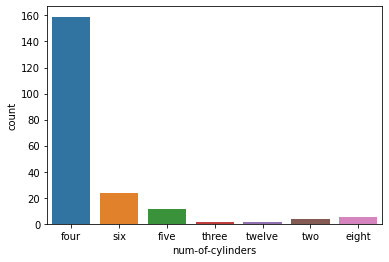

In [13]:
#determing the count of the cars having different number of cylinders
sns.countplot(x='num-of-cylinders',data=data)
plt.savefig('countplot1.png', dpi=300, bbox_inches='tight')

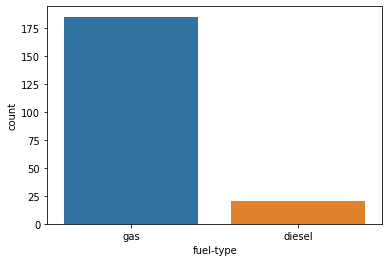

In [14]:
#To determine the count of cars based on the type of fuel. A countplot graph is being plotted.
sns.countplot(x='fuel-type',data=data)
plt.savefig('countplot2.png', dpi=300, bbox_inches='tight')

In [15]:
#•	Determining the correlation of parameters with respect to the price, we split the parameters into two list which help in easy comparison. Correlation of the parameter is determined using corr() function.

data[['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','price']].corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.861752
price,-0.082201,0.133999,0.583168,0.682986,0.728699,0.134388,0.820825,0.861752,1.000000


In [16]:
data[['bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']].corr()

,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
bore,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095
compression-ratio,0.005201,0.186105,1.000000,-0.205740,-0.435936,0.324701,0.265201,0.070990
horsepower,0.575737,0.088264,-0.205740,1.000000,0.130971,-0.803162,-0.770903,0.757917
peak-rpm,-0.254761,-0.066844,-0.435936,0.130971,1.000000,-0.113723,-0.054257,-0.100854
city-mpg,-0.584508,-0.042179,0.324701,-0.803162,-0.113723,1.000000,0.971337,-0.667449
highway-mpg,-0.586992,-0.043961,0.265201,-0.770903,-0.054257,0.971337,1.000000,-0.690526
price,0.532300,0.082095,0.070990,0.757917,-0.100854,-0.667449,-0.690526,1.000000


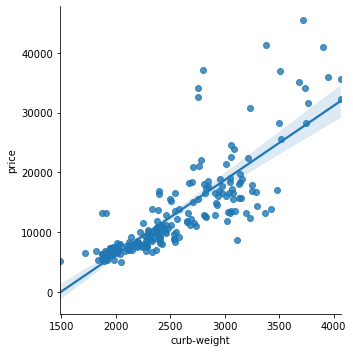

In [17]:
#It is observed that curb-weight, engine-size and horsepower are strongly correlated. While the parameters like highway-mpg, city-mpg are inversely correlated. This can be proven by plotting wrt price.

sns.lmplot(x='curb-weight',y='price',data=data)
plt.savefig('plot4.png', dpi=400, bbox_inches='tight')

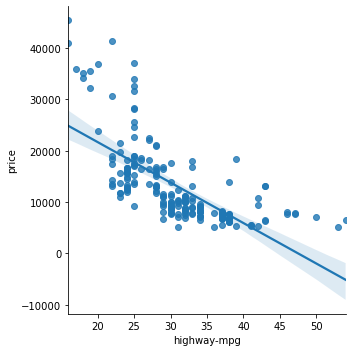

In [18]:
sns.lmplot(x='highway-mpg',y='price',data=data)
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')

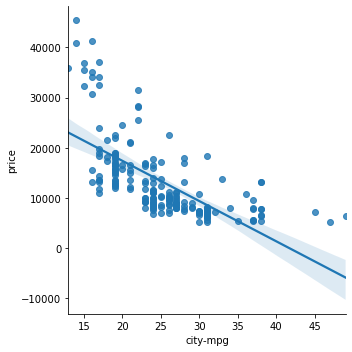

In [19]:
    sns.lmplot(x='city-mpg',y='price',data=data)
    plt.savefig('plot7.png', dpi=300, bbox_inches='tight')

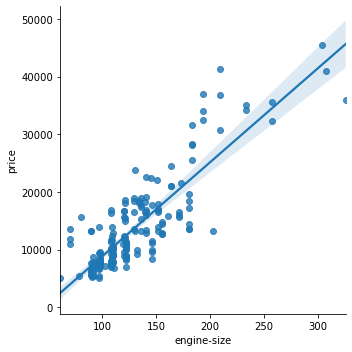

In [20]:

sns.lmplot(x='engine-size',y='price',data=data)
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')

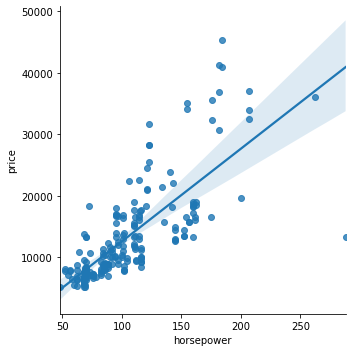

In [21]:
#To plot the graph between engine-size vs price
sns.lmplot(x='horsepower',y='price',data=data)
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')

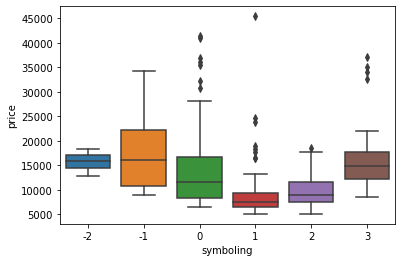

In [22]:
#Following shows the boxplot of the symboling vs price. It is observed that with more safety of the car the price would increase by neglecting these anamolies
sns.boxplot(x='symboling',y='price',data=data)
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')

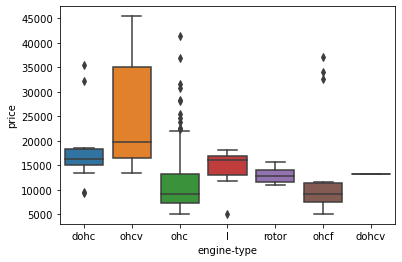

In [23]:
#Following shows the boxplot of the symboling vs price. It is observed that with more safety of the car the price would increase by neglecting these anamolies
sns.boxplot(x='engine-type',y='price',data=data)
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')

In [24]:
#to see the updated info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [25]:
#importing OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

In [26]:
#Parameters like symbolling, fuel-type, engine-location, aspiration, num-of-doors, body-style, make, drive-wheels, num-of-cylinders and engine-type has to be converted.Therefore, by using get_dummies function we convert those data type.


symbol=pd.get_dummies(data['symboling'],drop_first=True)
Fuel_type=pd.get_dummies(data['fuel-type'],drop_first=True)
engine_loc=pd.get_dummies(data['engine-location'],drop_first=True)
aspiration=pd.get_dummies(data['aspiration'],drop_first=True)
num_of_doors=pd.get_dummies(data['num-of-doors'],drop_first=True)
body_style=pd.get_dummies(data['body-style'],drop_first=True)
makes=pd.get_dummies(data['make'],drop_first=True)
drive_wheel=pd.get_dummies(data['drive-wheels'],drop_first=True)
numofcyl=pd.get_dummies(data['num-of-cylinders'],drop_first=True)
engine_type=pd.get_dummies(data['engine-type'],drop_first=True)




In [27]:
#Now these existing columns has to be dropped(removed) from the data sets, and the columns obtained from one hot encoder has to be concatenated.
data.drop(['fuel-type','engine-location','aspiration','num-of-doors','body-style','make','drive-wheels','num-of-cylinders','engine-type'],axis=1,inplace=True)

In [28]:
data=pd.concat([data,Fuel_type,engine_loc,aspiration,num_of_doors,body_style,makes,drive_wheel,numofcyl,engine_type],axis=1)

In [29]:
#to check the existense of any object type parameter
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   fuel-system        205 non-null    object 
 9   bore               205 non-null    float64
 10  stroke             205 non-null    float64
 11  compression-ratio  205 non-null    float64
 12  horsepower         205 non-null    float64
 13  peak-rpm           205 non-null    float64
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              205 non

# TRAINING THE DATA SETS

In [30]:
#import train_test split library
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test=train_test_split(data.drop(['fuel-system','price'],axis=1),data['price'],test_size=0.2)

## LINEAR REGRESSION

In [32]:
#import linear regression from sklearn.linear model
from sklearn.linear_model import LinearRegression

In [33]:
#intialise linear regression as lm
lm=LinearRegression()

In [34]:
# Now the dataset which has to be trained will be fit using .fit method and predict the value with the help of testing datasets using .predict method
lm.fit(X_train,y_train)
pred=lm.predict(X_test)

In [35]:
#to get to know the accuracy
from sklearn import metrics
print('R2_score:',metrics.r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))


R2_score: 0.8281797807417425
MAE: 2076.925524717117
MSE: 10542024.453221867
RMSE: 3246.8483877788112


Text(0, 0.5, 'pred')

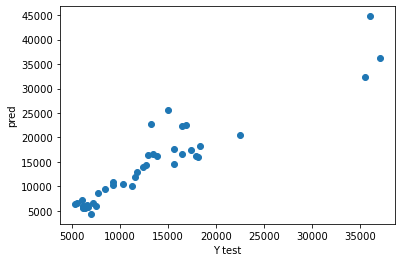

In [36]:
plt.scatter(y_test,pred)
plt.xlabel('Y test')
plt.ylabel('pred')

# Decision trees

In [37]:
#import decision tree from sklearn
from sklearn import tree

In [38]:
X_train, X_test, y_train, y_test=train_test_split(data.drop(['fuel-system','price'],axis=1),data['price'],test_size=0.2)

In [39]:
#initialize decisionTreeRegressor as dt
dt=tree.DecisionTreeRegressor()

In [40]:
# Now the dataset which has to be trained will be fit using .fit method and predict the value with the help of testing datasets using .predict method
dt=dt.fit(X_train,y_train)
pred=dt.predict(X_test)

In [41]:
#to get to know the accuracy
from sklearn import metrics
print('R2_score:',metrics.r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9543644236834501
MAE: 1385.8048780487804
MSE: 3868436.1463414636
RMSE: 1966.8340413826133


## RandomForest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
#initialize RandomForestRegressor as reg
reg=RandomForestRegressor()

In [44]:
# Now the dataset which has to be trained will be fit using .fit method and predict the value with the help of testing datasets using .predict method
reg.fit(X_train,y_train)
pred=reg.predict(X_test)

In [45]:
#to get to know the accuracy
from sklearn import metrics
print(metrics.r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

0.93917784809045
MAE: 1588.4076866278363
MSE: 5155771.657469948
RMSE: 2270.632435571629


## AdaBoost Regressor

In [46]:
from sklearn.ensemble import AdaBoostRegressor

In [47]:
#initialize AdaBoostRegressor as abr
abr=AdaBoostRegressor()

In [48]:
# Now the dataset which has to be trained will be fit using .fit method and predict the value with the help of testing datasets using .predict method
abr.fit(X_train,y_train)
pred=abr.predict(X_test)

In [49]:
print(metrics.r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

0.8944893667369549
MAE: 2378.8815784718345
MSE: 8943924.466011856
RMSE: 2990.6394744288145


## GradientBoostingRegressor 

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
#initialize AdaBoostRegressor as GBR
GBR=GradientBoostingRegressor()

In [52]:
# Now the dataset which has to be trained will be fit using .fit method and predict the value with the help of testing datasets using .predict method
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)

In [53]:
print(metrics.r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

0.9329008431000829
MAE: 1646.7975052433246
MSE: 5687860.763282245
RMSE: 2384.9236388786635
